In [1]:
!pip install car-sound-dataset

In [5]:
# Install the package if not already installed
# !pip install car-sound-dataset

# Install PortAudio development files
!apt-get update
!apt-get install -y libportaudio2 portaudio19-dev

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the dataset class
from car_sound_dataset.car_dataset import CarSoundDataset

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Setup complete!")

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [6]:

dataset = CarSoundDataset()


print("Downloading dataset...")
car_data = dataset.download_and_get_dataset()

print(f"\nDataset loaded successfully!")
print(f"Total events: {len(car_data)}")


Downloading...
From (original): https://drive.google.com/uc?id=1GjEs-S12RH2X70I3pEBMFY2RQ1c_ol1a
From (redirected): https://drive.google.com/uc?id=1GjEs-S12RH2X70I3pEBMFY2RQ1c_ol1a&confirm=t&uuid=5d25cc73-4ccb-439b-94c2-27d72fffab2c
To: /content/CAR_SOUNDS.zip
100%|██████████| 1.19G/1.19G [00:22<00:00, 52.3MB/s]


Unzipping is in progress...
Unzipping finished.


Downloading...
From: https://drive.google.com/uc?id=1HJNGzD8g6rLrONBK9WB9sEExlqHHKkTv
To: /content/car_sound_events.json
100%|██████████| 3.55M/3.55M [00:00<00:00, 265MB/s]


Dataset loaded successfully!
Total events: 17121


In [7]:
# Examine the structure of the dataset
print("Sample event structure:")
sample_event_id = list(car_data.keys())[0]
print(f"\nEvent ID: {sample_event_id}")
print(f"Recordings: {car_data[sample_event_id]}")
print(f"\nNumber of devices: {len(car_data[sample_event_id])}")
print(f"Recordings present: {sum(1 for r in car_data[sample_event_id] if r is not None)}")


Sample event structure:

Event ID: 1
Recordings: [None, None, 'D3_record_21_06_01_10_51_51_30.wav', None, None, None]

Number of devices: 6
Recordings present: 1


In [8]:
# Analyze device recording patterns
device_counts = []
device_patterns = []

for event_id, recordings in car_data.items():
    count = sum(1 for r in recordings if r is not None)
    device_counts.append(count)

    # Create pattern string
    pattern = ''.join(['1' if r is not None else '0' for r in recordings])
    device_patterns.append(pattern)

# Count distribution
count_distribution = Counter(device_counts)
print("Device count distribution:")
for count in sorted(count_distribution.keys()):
    print(f"  {count} device(s): {count_distribution[count]} events ({count_distribution[count]/len(car_data)*100:.2f}%)")

# Most common patterns
pattern_counts = Counter(device_patterns)
print("\nTop 10 most common device patterns:")
for pattern, count in pattern_counts.most_common(10):
    device_list = [f"D{i+1}" if bit == '1' else 'X' for i, bit in enumerate(pattern)]
    print(f"  {pattern} ({''.join(device_list)}): {count} events")


Device count distribution:
  1 device(s): 1583 events (9.25%)
  2 device(s): 1315 events (7.68%)
  3 device(s): 1612 events (9.42%)
  4 device(s): 2047 events (11.96%)
  5 device(s): 6945 events (40.56%)
  6 device(s): 3619 events (21.14%)

Top 10 most common device patterns:
  111011 (D1D2D3XD5D6): 5462 events
  111111 (D1D2D3D4D5D6): 3619 events
  010111 (XD2XD4D5D6): 595 events
  101111 (D1XD3D4D5D6): 569 events
  000111 (XXXD4D5D6): 508 events
  000100 (XXXD4XX): 461 events
  000010 (XXXXD5X): 370 events
  011111 (XD2D3D4D5D6): 332 events
  000011 (XXXXD5D6): 294 events
  001000 (XXD3XXX): 293 events


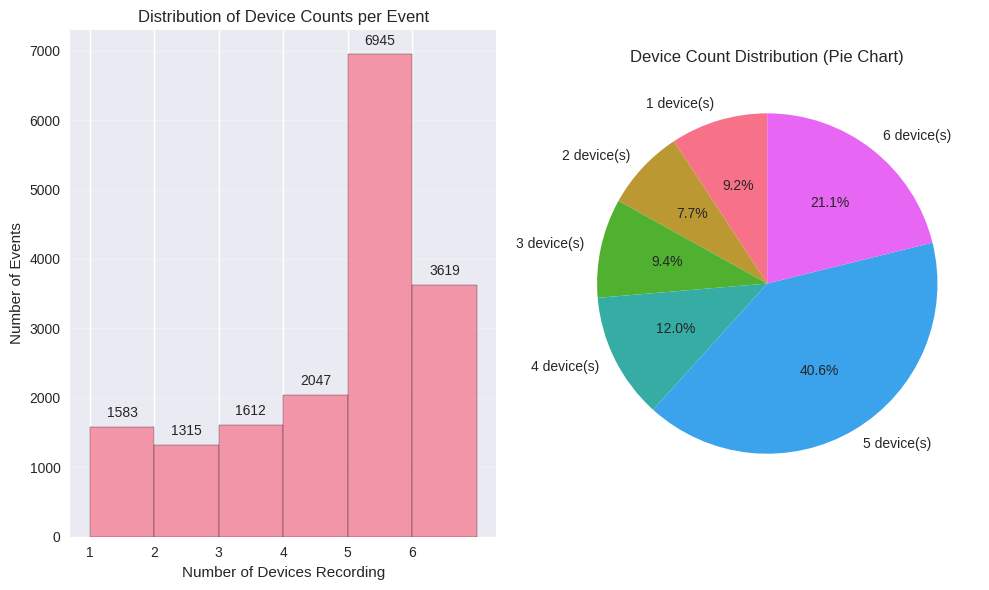

In [9]:
# Visualize device count distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
counts, bins, patches = plt.hist(device_counts, bins=range(1, 8), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Devices Recording')
plt.ylabel('Number of Events')
plt.title('Distribution of Device Counts per Event')
plt.xticks(range(1, 7))
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, count in enumerate(counts):
    if count > 0:
        plt.text(bins[i] + 0.5, count + 100, str(int(count)), ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie([count_distribution[i] for i in sorted(count_distribution.keys())],
        labels=[f"{i} device(s)" for i in sorted(count_distribution.keys())],
        autopct='%1.1f%%', startangle=90)
plt.title('Device Count Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


In [10]:
# Load a sample event to analyze audio characteristics
from scipy.io.wavfile import read
import os

# Get a sample event with multiple recordings
sample_events = [eid for eid, recs in car_data.items()
                 if sum(1 for r in recs if r is not None) >= 3][:5]

print(f"Analyzing sample events: {sample_events}")

# Analyze audio characteristics
audio_stats = []

for event_id in sample_events[:3]:  # Analyze first 3
    recordings = car_data[event_id]
    for i, recording in enumerate(recordings):
        if recording is not None:
            filepath = os.path.join('CAR_SOUNDS', recording)
            if os.path.exists(filepath):
                freq, sound_data = read(filepath)

                audio_stats.append({
                    'event_id': event_id,
                    'device': i + 1,
                    'mean': np.mean(sound_data),
                    'std': np.std(sound_data),
                    'min': np.min(sound_data),
                    'max': np.max(sound_data),
                    'rms': np.sqrt(np.mean(sound_data**2)),
                    'zero_crossings': np.sum(np.diff(np.sign(sound_data)) != 0)
                })

print(f"\nAnalyzed {len(audio_stats)} recordings")
print("\nSample statistics:")
for stat in audio_stats[:5]:
    print(f"  Event {stat['event_id']}, Device {stat['device']}: "
          f"Mean={stat['mean']:.2f}, Std={stat['std']:.2f}, RMS={stat['rms']:.2f}")


Analyzing sample events: [21, 25, 26, 28, 31]

Analyzed 10 recordings

Sample statistics:
  Event 21, Device 1: Mean=-0.50, Std=63.22, RMS=51.95
  Event 21, Device 2: Mean=-0.40, Std=59.38, RMS=46.73
  Event 21, Device 3: Mean=-0.14, Std=79.41, RMS=55.93
  Event 25, Device 2: Mean=-0.07, Std=89.27, RMS=55.94
  Event 25, Device 3: Mean=-0.25, Std=164.06, RMS=61.42


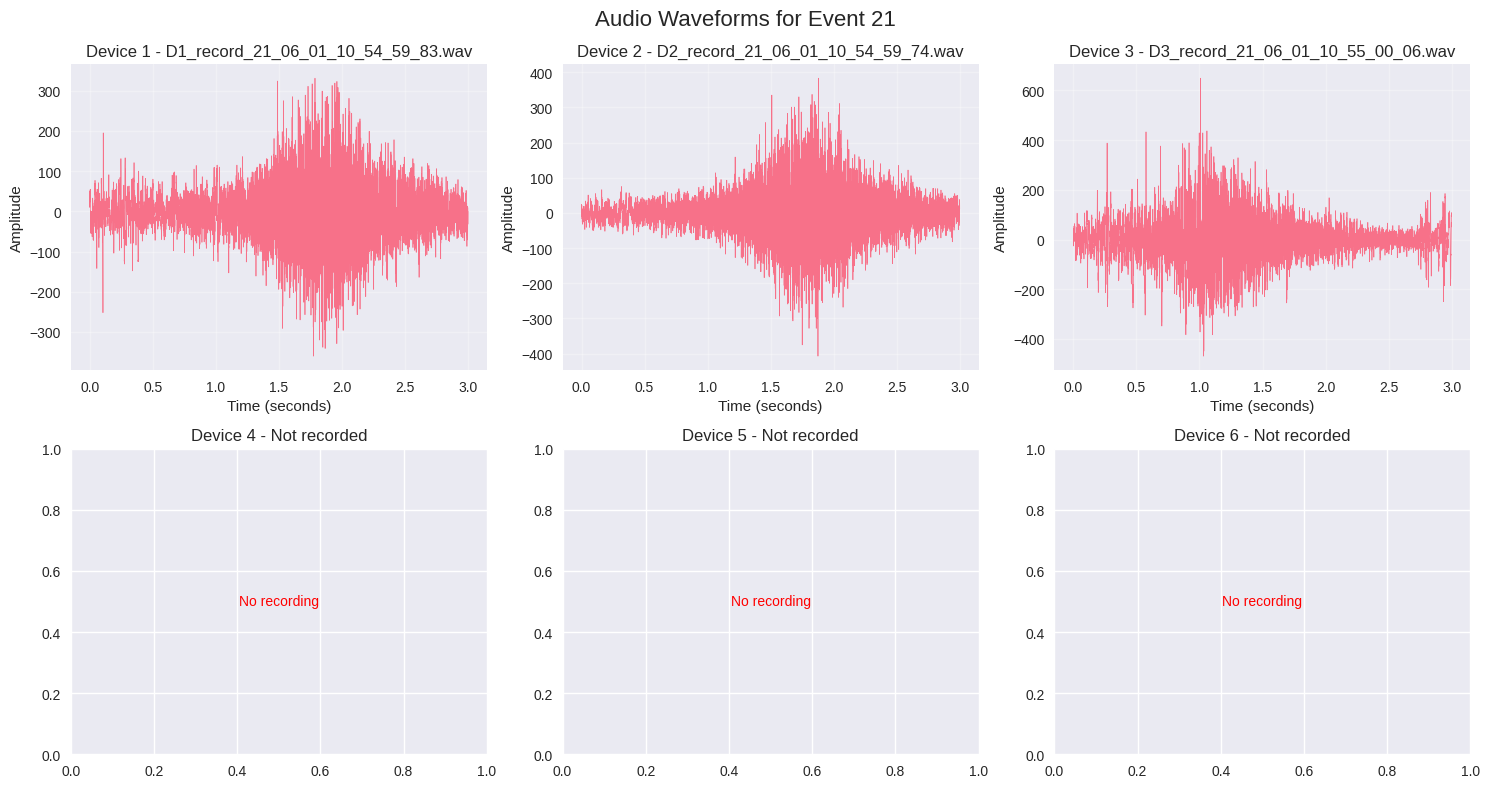

In [11]:
# Visualize sample audio waveforms
if len(sample_events) > 0 and os.path.exists('CAR_SOUNDS'):
    event_id = sample_events[0]
    recordings = car_data[event_id]

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle(f'Audio Waveforms for Event {event_id}', fontsize=16)

    for i, recording in enumerate(recordings):
        row = i // 3
        col = i % 3
        ax = axes[row, col]

        if recording is not None:
            filepath = os.path.join('CAR_SOUNDS', recording)
            if os.path.exists(filepath):
                freq, sound_data = read(filepath)
                time_axis = np.arange(len(sound_data)) / freq
                ax.plot(time_axis, sound_data, linewidth=0.5)
                ax.set_title(f'Device {i+1} - {recording}')
                ax.set_xlabel('Time (seconds)')
                ax.set_ylabel('Amplitude')
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'File not found', ha='center', va='center')
                ax.set_title(f'Device {i+1} - Not recorded')
        else:
            ax.text(0.5, 0.5, 'No recording', ha='center', va='center', color='red')
            ax.set_title(f'Device {i+1} - Not recorded')

    plt.tight_layout()
    plt.show()
else:
    print("Dataset files not found. Please run the download cell first.")


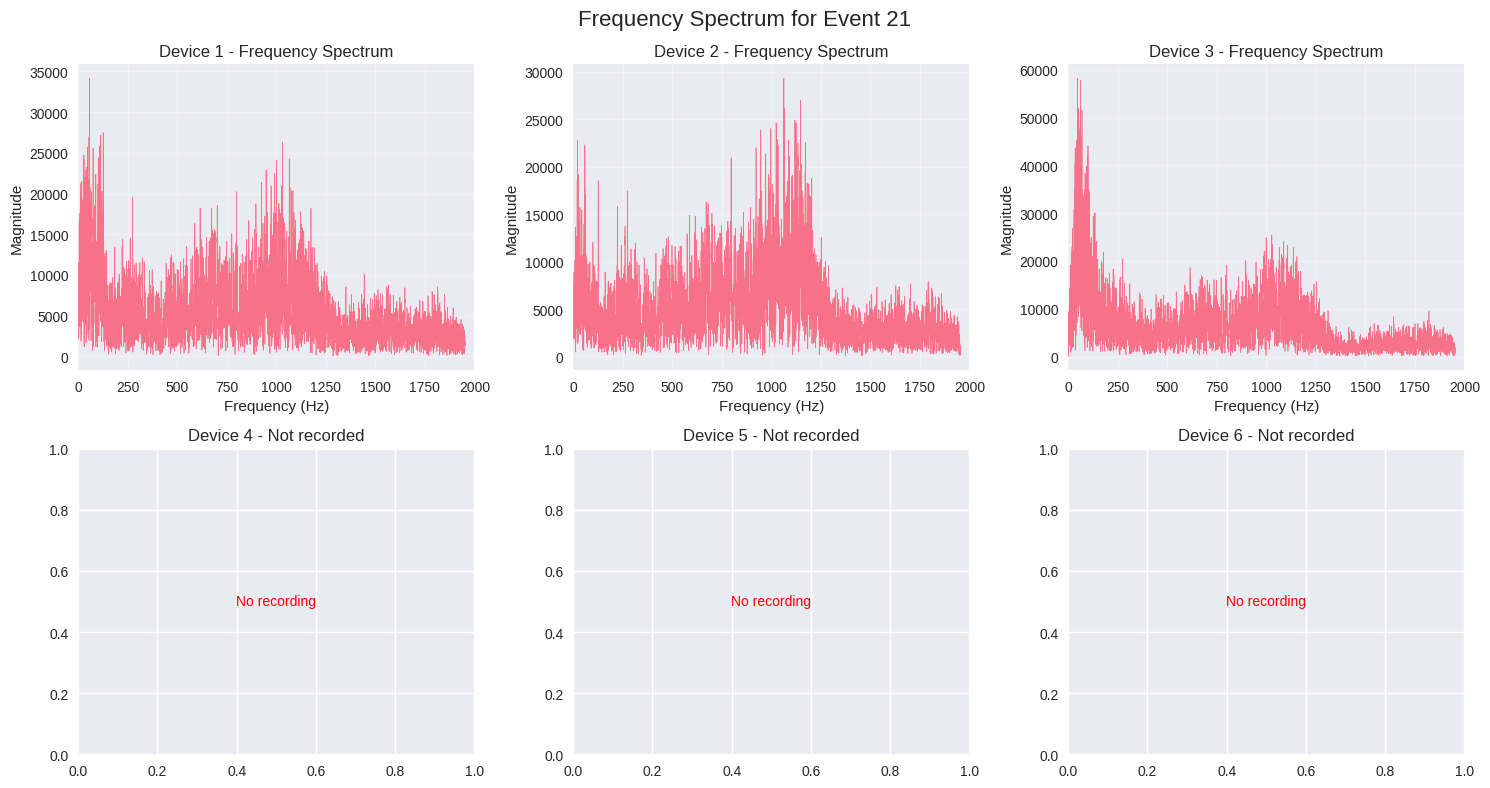

In [12]:
# Frequency domain analysis (FFT)
if len(sample_events) > 0 and os.path.exists('CAR_SOUNDS'):
    from scipy.fft import fft, fftfreq

    event_id = sample_events[0]
    recordings = car_data[event_id]

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle(f'Frequency Spectrum for Event {event_id}', fontsize=16)

    for i, recording in enumerate(recordings):
        row = i // 3
        col = i % 3
        ax = axes[row, col]

        if recording is not None:
            filepath = os.path.join('CAR_SOUNDS', recording)
            if os.path.exists(filepath):
                freq, sound_data = read(filepath)

                # Compute FFT
                fft_vals = fft(sound_data)
                fft_freq = fftfreq(len(sound_data), 1/freq)

                # Plot magnitude spectrum (only positive frequencies)
                positive_freq_idx = fft_freq > 0
                ax.plot(fft_freq[positive_freq_idx],
                       np.abs(fft_vals[positive_freq_idx]),
                       linewidth=0.5)
                ax.set_title(f'Device {i+1} - Frequency Spectrum')
                ax.set_xlabel('Frequency (Hz)')
                ax.set_ylabel('Magnitude')
                ax.set_xlim(0, 2000)  # Focus on lower frequencies
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'File not found', ha='center', va='center')
                ax.set_title(f'Device {i+1} - Not recorded')
        else:
            ax.text(0.5, 0.5, 'No recording', ha='center', va='center', color='red')
            ax.set_title(f'Device {i+1} - Not recorded')

    plt.tight_layout()
    plt.show()
else:
    print("Dataset files not found. Please run the download cell first.")


In [13]:
# Example 1: Filter events with at least 4 devices
events_4plus = dataset.filter_by_min_device_count(car_data, 4)
print(f"Events with at least 4 devices: {len(events_4plus)}")

# Example 2: Filter events with exactly 3 devices
events_exact_3 = dataset.filter_by_exact_device_count(car_data, 3)
print(f"Events with exactly 3 devices: {len(events_exact_3)}")

# Example 3: Filter by pattern (e.g., devices 2 and 5 recorded, device 1 didn't)
pattern_filtered = dataset.filter_by_pattern(car_data, ['0', '1', 'X', 'X', '1', 'X'])
print(f"Events matching pattern [0,1,X,X,1,X]: {len(pattern_filtered)}")

# Show sample of filtered events
if len(events_4plus) > 0:
    print(f"\nSample event IDs with 4+ devices: {list(events_4plus.keys())[:10]}")


Events with at least 4 devices: 12611
Events with exactly 3 devices: 1612
Events matching pattern [0,1,X,X,1,X]: 11251

Sample event IDs with 4+ devices: [25, 33, 34, 39, 40, 41, 42, 43, 49, 50]


In [14]:
# Load data as pool (each recording is separate)
# This is useful for single-recording classification tasks
print("Loading data as pool (individual recordings)...")
sample_pool = dataset.load_dict_as_pool(car_data)
print(f"Pool shape: {sample_pool.shape}")
print(f"Format: (recordings, channels, samples)")
print(f"Total recordings: {sample_pool.shape[0]}")
print(f"Samples per recording: {sample_pool.shape[2]}")


Loading data as pool (individual recordings)...
Pool shape: (73676, 1, 11712)
Format: (recordings, channels, samples)
Total recordings: 73676
Samples per recording: 11712


In [15]:
# Load data preserving event structure
# This is useful for multi-recording event analysis
print("Loading data preserving event structure...")
sample_events_data = dataset.load_dict(car_data, is_random=False)
print(f"Events data shape: {sample_events_data.shape}")
print(f"Format: (events, recordings_per_event, samples)")
print(f"Total events: {sample_events_data.shape[0]}")
print(f"Recordings per event: {sample_events_data.shape[1]}")
print(f"Samples per recording: {sample_events_data.shape[2]}")


Loading data preserving event structure...
Events data shape: (17121, 1, 11712)
Format: (events, recordings_per_event, samples)
Total events: 17121
Recordings per event: 1
Samples per recording: 11712


In [1]:

import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries loaded successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries loaded successfully!
TensorFlow version: 2.19.0


In [19]:
# ============================================
# TOY CAR DATASET LOADER (Filename-based labels)
# ============================================

class ToyCarDatasetLoader:
    """
    Loader for ToyCar dataset where labels are in filenames
    Structure: train/ and test/ folders with files containing 'normal' or 'anomaly' in name
    """

    def __init__(self, data_dir='ToyCar'):
        self.data_dir = data_dir
        self.train_dir = os.path.join(data_dir, 'train')
        self.test_dir = os.path.join(data_dir, 'test')

    def get_label_from_filename(self, filename):
        """Extract label from filename"""
        filename_lower = filename.lower()
        if 'anomaly' in filename_lower or 'anomalous' in filename_lower:
            return 1  # Anomalous
        elif 'normal' in filename_lower:
            return 0  # Normal
        else:
            return None  # Unknown

    def get_audio_files(self, directory):
        """Get all audio files from directory with their labels"""
        audio_files = []
        labels = []

        if not os.path.exists(directory):
            print(f"Directory not found: {directory}")
            return audio_files, labels

        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith(('.wav', '.flac', '.mp3')):
                    filepath = os.path.join(root, file)
                    label = self.get_label_from_filename(file)
                    if label is not None:
                        audio_files.append(filepath)
                        labels.append(label)

        return sorted(audio_files), labels

    def load_dataset(self, use_train=True, use_test=True, max_samples=None, sr=16000,
                     combine_and_split=True, test_size=0.2):
        """
        Load the complete dataset

        Args:
            use_train: Load training data (only normal in train folder)
            use_test: Load test data (both normal and anomaly)
            max_samples: Limit number of samples per class
            sr: Sample rate
            combine_and_split: If True, combine train+test and split properly (recommended)
            test_size: Test split ratio if combine_and_split=True

        Returns:
            X_train, X_test, y_train, y_test, filepaths_train, filepaths_test
        """
        X_all = []
        y_all = []
        filepaths_all = []

        # Load training data
        if use_train and os.path.exists(self.train_dir):
            print("Loading training data...")
            train_files, train_labels = self.get_audio_files(self.train_dir)
            print(f"Found {len(train_files)} training files")

            normal_count = 0
            for filepath, label in zip(train_files, train_labels):
                if max_samples and label == 0 and normal_count >= max_samples:
                    continue
                try:
                    audio, _ = librosa.load(filepath, sr=sr, duration=10)
                    X_all.append(audio)
                    y_all.append(label)
                    filepaths_all.append(filepath)
                    if label == 0:
                        normal_count += 1
                except Exception as e:
                    print(f"Error loading {filepath}: {e}")
                    continue

        # Load test data
        if use_test and os.path.exists(self.test_dir):
            print("\nLoading test data...")
            test_files, test_labels = self.get_audio_files(self.test_dir)
            print(f"Found {len(test_files)} test files")

            normal_count = 0
            anomaly_count = 0
            for filepath, label in zip(test_files, test_labels):
                if max_samples:
                    if label == 0 and normal_count >= max_samples:
                        continue
                    if label == 1 and anomaly_count >= max_samples:
                        continue

                try:
                    audio, _ = librosa.load(filepath, sr=sr, duration=10)
                    X_all.append(audio)
                    y_all.append(label)
                    filepaths_all.append(filepath)
                    if label == 0:
                        normal_count += 1
                    else:
                        anomaly_count += 1
                except Exception as e:
                    print(f"Error loading {filepath}: {e}")
                    continue

        # Combine and split properly if requested
        if combine_and_split:
            print("\nCombining train and test data, then splitting properly...")
            X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
                X_all, y_all, filepaths_all,
                test_size=test_size,
                random_state=42,
                stratify=y_all  # Ensures both classes in train and test
            )
        else:
            # Use original train/test split
            X_train = X_all[:len([x for x in y_all if x == 0])]  # Only normal from train
            y_train = y_all[:len([x for x in y_all if x == 0])]
            paths_train = filepaths_all[:len([x for x in y_all if x == 0])]

            X_test = X_all[len([x for x in y_all if x == 0]):]  # Test data
            y_test = y_all[len([x for x in y_all if x == 0]):]
            paths_test = filepaths_all[len([x for x in y_all if x == 0]):]

        # Summary
        print("\n" + "=" * 60)
        print("DATASET SUMMARY")
        print("=" * 60)
        print(f"Training set: {len(X_train)} samples")
        if len(X_train) > 0:
            train_normal = sum(1 for y in y_train if y == 0)
            train_anomaly = sum(1 for y in y_train if y == 1)
            print(f"  Normal: {train_normal}, Anomalous: {train_anomaly}")

        print(f"\nTest set: {len(X_test)} samples")
        if len(X_test) > 0:
            test_normal = sum(1 for y in y_test if y == 0)
            test_anomaly = sum(1 for y in y_test if y == 1)
            print(f"  Normal: {test_normal}, Anomalous: {test_anomaly}")
        print("=" * 60)

        return (X_train, X_test, np.array(y_train), np.array(y_test),
                paths_train, paths_test)

# Initialize loader
loader = ToyCarDatasetLoader(data_dir='/content/drive/MyDrive/ToyCar')

# Test loading - IMPORTANT: combine_and_split=True ensures both classes in training
print("Testing dataset loader...")
X_train, X_test, y_train, y_test, paths_train, paths_test = loader.load_dataset(
    use_train=True,
    use_test=True,
    max_samples=500,  # Limit for quick testing, remove for full dataset
    sr=16000,
    combine_and_split=True,  # CRITICAL: This ensures training has both normal and anomalous
    test_size=0.2
)

Testing dataset loader...
Loading training data...
Found 1000 training files

Loading test data...
Found 200 test files

Combining train and test data, then splitting properly...

DATASET SUMMARY
Training set: 560 samples
  Normal: 480, Anomalous: 80

Test set: 140 samples
  Normal: 120, Anomalous: 20


In [9]:
# ============================================
# FEATURE EXTRACTION
# ============================================

def extract_mfcc_features(audio, sr=16000, n_mfcc=13):
    """Extract MFCC features"""
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    # Average over time
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

def extract_melspectrogram(audio, sr=16000, n_mels=128, hop_length=512):
    """Extract mel-spectrogram"""
    mel_spec = librosa.feature.melspectrogram(
        y=audio, sr=sr, n_mels=n_mels, hop_length=hop_length
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

def extract_multiple_features(audio, sr=16000):
    """Extract multiple audio features"""
    features = {}

    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    features['mfcc_mean'] = np.mean(mfcc, axis=1)
    features['mfcc_std'] = np.std(mfcc, axis=1)

    # Spectral features
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    features['spectral_centroid_mean'] = np.mean(spectral_centroids)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    features['spectral_rolloff_mean'] = np.mean(spectral_rolloff)

    zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)[0]
    features['zcr_mean'] = np.mean(zero_crossing_rate)

    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    features['chroma_mean'] = np.mean(chroma, axis=1)

    # Combine all features
    feature_vector = np.concatenate([
        features['mfcc_mean'],
        features['mfcc_std'],
        [features['spectral_centroid_mean']],
        [features['spectral_rolloff_mean']],
        [features['zcr_mean']],
        features['chroma_mean']
    ])

    return feature_vector

def prepare_features(X_audio, feature_type='mfcc', sr=16000):
    """
    Extract features from audio data

    feature_type: 'mfcc', 'melspectrogram', or 'multiple'
    """
    X_features = []

    print(f"Extracting {feature_type} features...")
    for i, audio in enumerate(X_audio):
        if (i + 1) % 100 == 0:
            print(f"  Processed {i + 1}/{len(X_audio)} samples")

        if feature_type == 'mfcc':
            features = extract_mfcc_features(audio, sr=sr)
        elif feature_type == 'melspectrogram':
            features = extract_melspectrogram(audio, sr=sr)
            # Flatten for traditional ML, or keep 2D for CNN
            features = features.flatten()
        elif feature_type == 'multiple':
            features = extract_multiple_features(audio, sr=sr)
        else:
            raise ValueError(f"Unknown feature type: {feature_type}")

        X_features.append(features)

    return np.array(X_features)

In [20]:
# ============================================
# FEATURE EXTRACTION
# ============================================

def extract_mfcc_features(audio, sr=16000, n_mfcc=13):
    """Extract MFCC features"""
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    # Average over time
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

def extract_melspectrogram(audio, sr=16000, n_mels=128, hop_length=512):
    """Extract mel-spectrogram"""
    mel_spec = librosa.feature.melspectrogram(
        y=audio, sr=sr, n_mels=n_mels, hop_length=hop_length
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

def extract_multiple_features(audio, sr=16000):
    """Extract multiple audio features"""
    features = {}

    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    features['mfcc_mean'] = np.mean(mfcc, axis=1)
    features['mfcc_std'] = np.std(mfcc, axis=1)

    # Spectral features
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    features['spectral_centroid_mean'] = np.mean(spectral_centroids)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    features['spectral_rolloff_mean'] = np.mean(spectral_rolloff)

    zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)[0]
    features['zcr_mean'] = np.mean(zero_crossing_rate)

    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    features['chroma_mean'] = np.mean(chroma, axis=1)

    # Combine all features
    feature_vector = np.concatenate([
        features['mfcc_mean'],
        features['mfcc_std'],
        [features['spectral_centroid_mean']],
        [features['spectral_rolloff_mean']],
        [features['zcr_mean']],
        features['chroma_mean']
    ])

    return feature_vector

def prepare_features(X_audio, feature_type='mfcc', sr=16000):
    """
    Extract features from audio data

    feature_type: 'mfcc', 'melspectrogram', or 'multiple'
    """
    X_features = []

    print(f"Extracting {feature_type} features...")
    for i, audio in enumerate(X_audio):
        if (i + 1) % 100 == 0:
            print(f"  Processed {i + 1}/{len(X_audio)} samples")

        if feature_type == 'mfcc':
            features = extract_mfcc_features(audio, sr=sr)
        elif feature_type == 'melspectrogram':
            features = extract_melspectrogram(audio, sr=sr)
            # Flatten for traditional ML, or keep 2D for CNN
            features = features.flatten()
        elif feature_type == 'multiple':
            features = extract_multiple_features(audio, sr=sr)
        else:
            raise ValueError(f"Unknown feature type: {feature_type}")

        X_features.append(features)

    return np.array(X_features)

# ============================================
# MODEL ARCHITECTURES (IMPROVED)
# ============================================

def build_mlp_classifier(input_dim, num_classes=2):
    """Build an improved MLP with better regularization"""
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,),
                    kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  # Increased dropout

        layers.Dense(128, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(64, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def get_class_weights(y_train):
    """Calculate class weights to handle imbalance"""
    from collections import Counter
    class_counts = Counter(y_train)
    total = len(y_train)

    # Calculate weights: more weight to minority class
    weight_for_0 = total / (2.0 * class_counts[0])
    weight_for_1 = total / (2.0 * class_counts[1])

    class_weight = {0: weight_for_0, 1: weight_for_1}

    print(f"Class weights: {class_weight}")
    print(f"  Normal (0): {class_counts[0]} samples, weight: {weight_for_0:.3f}")
    print(f"  Anomalous (1): {class_counts[1]} samples, weight: {weight_for_1:.3f}")

    return class_weight

In [21]:
# ============================================
# COMPLETE TRAINING PIPELINE (IMPROVED)
# ============================================

def train_model_improved(X_train, X_test, y_train, y_test,
                        feature_type='multiple', epochs=100, batch_size=32):
    """
    Improved training pipeline with:
    - Better features
    - Class weights
    - Better regularization
    - Early stopping on validation loss
    """
    print("=" * 60)
    print("IMPROVED TRAINING PIPELINE")
    print("=" * 60)

    # Step 1: Extract features
    print("\nStep 1: Extracting features...")
    X_train_features = prepare_features(X_train, feature_type=feature_type)
    X_test_features = prepare_features(X_test, feature_type=feature_type)

    print(f"Train features shape: {X_train_features.shape}")
    print(f"Test features shape: {X_test_features.shape}")

    # Step 2: Normalize
    print("\nStep 2: Normalizing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_features)
    X_test_scaled = scaler.transform(X_test_features)

    # Step 3: Calculate class weights
    print("\nStep 3: Calculating class weights...")
    class_weights = get_class_weights(y_train)

    # Step 4: Build model
    print("\nStep 4: Building model...")
    model = build_mlp_classifier(input_dim=X_train_scaled.shape[1])
    model.summary()

    # Step 5: Setup callbacks
    print("\nStep 5: Setting up callbacks...")
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )

    # Step 6: Train
    print("\nStep 6: Training model...")
    print("=" * 60)
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weights,  # IMPORTANT: Use class weights
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Step 7: Evaluate
    print("\n" + "=" * 60)
    print("Step 7: Evaluating model...")
    print("=" * 60)

    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Predictions
    y_pred_proba = model.predict(X_test_scaled, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=['Normal', 'Anomalous']))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # ROC AUC
    if len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        print(f"\nROC AUC Score: {roc_auc:.4f}")

    # Plot training history
    plot_training_history(history)

    return model, history, scaler, y_pred, y_pred_proba

def plot_training_history(history):
    """Plot training curves"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss
    axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Model Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Verify the loader
if X_train is not None and len(X_train) > 0:
    print(f"\n✓ Successfully loaded dataset!")
    print(f"  Train samples: {len(X_train)}")
    print(f"  Test samples: {len(X_test)}")

    # Check if training has both classes
    train_normal = sum(1 for y in y_train if y == 0)
    train_anomaly = sum(1 for y in y_train if y == 1)

    if train_anomaly == 0:
        print("\n⚠ WARNING: Training set has NO anomalous samples!")
        print("   The model won't learn to detect anomalies.")
        print("   Make sure combine_and_split=True in load_dataset()")
    else:
        print(f"\n✓ Training set has both classes:")
        print(f"   Normal: {train_normal}, Anomalous: {train_anomaly}")
else:
    print("⚠ Dataset not loaded. Check the path and structure.")


✓ Successfully loaded dataset!
  Train samples: 560
  Test samples: 140

✓ Training set has both classes:
   Normal: 480, Anomalous: 80


Starting improved training...
IMPROVED TRAINING PIPELINE

Step 1: Extracting features...
Extracting multiple features...
  Processed 100/560 samples
  Processed 200/560 samples
  Processed 300/560 samples
  Processed 400/560 samples
  Processed 500/560 samples
Extracting multiple features...
  Processed 100/140 samples
Train features shape: (560, 41)
Test features shape: (140, 41)

Step 2: Normalizing features...

Step 3: Calculating class weights...
Class weights: {0: 0.5833333333333334, 1: 3.5}
  Normal (0): 480 samples, weight: 0.583
  Anomalous (1): 80 samples, weight: 3.500

Step 4: Building model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,570 (209.26 KB)

 Trainable params: 52,802 (206.26 KB)

 Non-trainable params: 768 (3.00 KB)


Step 5: Setting up callbacks...

Step 6: Training model...
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.5394 - loss: 1.5634 - val_accuracy: 0.4214 - val_loss: 1.0525 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5625 - loss: 1.4678 - val_accuracy: 0.4571 - val_loss: 1.0584 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5886 - loss: 1.4859 - val_accuracy: 0.5286 - val_loss: 1.0246 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6216 - loss: 1.3742 - val_accuracy: 0.5857 - val_loss: 0.9951 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5650 - loss: 1.4181 - val_accuracy: 0.6357 - val_loss: 0.9696 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5688 - loss: 1.4483 - val_accuracy: 0.6500 - val_loss: 0.9503 - learning_rate: 1.0000e-04
Epoch 


Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.75      0.82       120
   Anomalous       0.25      0.50      0.33        20

    accuracy                           0.71       140
   macro avg       0.57      0.62      0.58       140
weighted avg       0.81      0.71      0.75       140


Confusion Matrix:
[[90 30]
 [10 10]]

ROC AUC Score: 0.6763


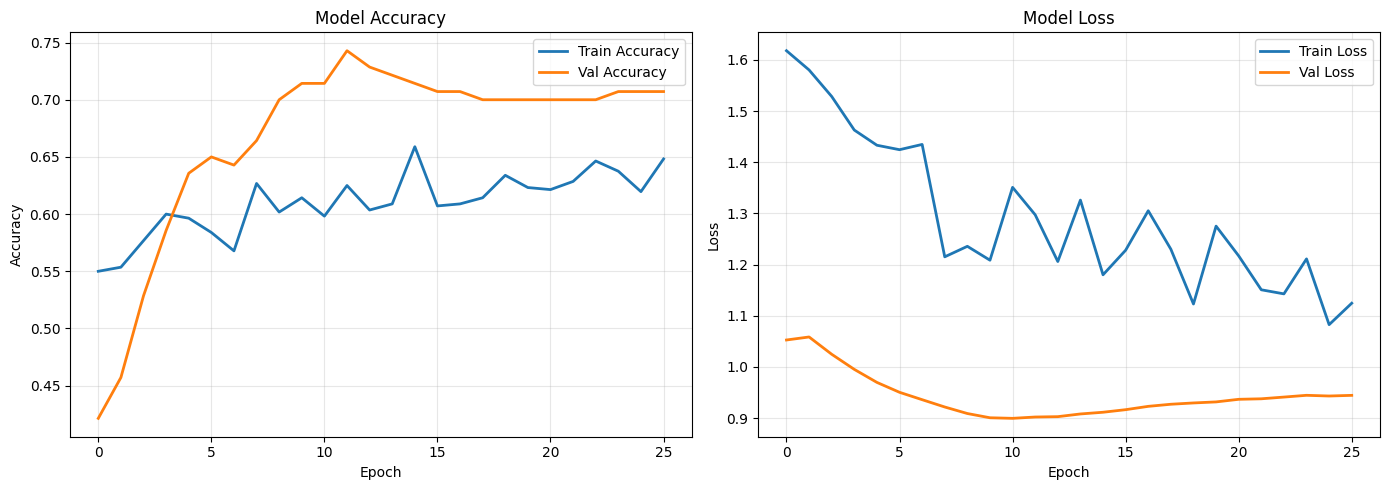

OSError: [Errno 95] Operation not supported: '/content/drive/Mydrive'

In [22]:
# ============================================
# RUN IMPROVED TRAINING
# ============================================

# Make sure data is loaded and has both classes
if X_train is not None and len(X_train) > 0:
    train_anomaly = sum(1 for y in y_train if y == 1)

    if train_anomaly > 0:
        print("Starting improved training...")
        print("=" * 60)

        # Train with improved pipeline
        model, history, scaler, y_pred, y_pred_proba = train_model_improved(
            X_train, X_test, y_train, y_test,
            feature_type='multiple',  # Use multiple features for better performance
            epochs=100,
            batch_size=32
        )

        # Save model
        model.save('/content/drive/Mydrive/toycar_anomaly_detector_improved.h5')
        print("\n✓ Model saved as 'toycar_anomaly_detector_improved.h5'")

    else:
        print("\n⚠ Cannot train: Training set has no anomalous samples!")
        print("Please reload data with combine_and_split=True")
else:
    print("⚠ Data not loaded. Please run the data loading cell first.")


In [24]:
model.save('/content/drive/MyDrive/toycar_anomaly_detector_improved.h5')

In [26]:
# ============================================
# INFERENCE CODE - PREDICT ON NEW AUDIO FILES
# ============================================

class AnomalyDetector:
    """
    Inference class for anomaly detection on new audio files
    """

    def __init__(self, model_path='toycar_anomaly_detector_improved.h5',
                 scaler=None, feature_type='multiple', sr=16000):
        """
        Initialize the detector

        Args:
            model_path: Path to saved model file
            scaler: Pre-fitted StandardScaler (if None, will try to load from training)
            feature_type: Type of features to extract ('mfcc', 'melspectrogram', 'multiple')
            sr: Sample rate for audio loading
        """
        self.model_path = model_path
        self.scaler = scaler
        self.feature_type = feature_type
        self.sr = sr

        # Load model
        print(f"Loading model from {model_path}...")
        try:
            self.model = keras.models.load_model(model_path)
            print("✓ Model loaded successfully!")
        except Exception as e:
            print(f"✗ Error loading model: {e}")
            self.model = None

    def preprocess_audio(self, audio_file):
        """
        Load and preprocess a single audio file

        Args:
            audio_file: Path to audio file or audio array

        Returns:
            Preprocessed audio array
        """
        if isinstance(audio_file, str):
            # Load from file
            if not os.path.exists(audio_file):
                raise FileNotFoundError(f"Audio file not found: {audio_file}")
            audio, _ = librosa.load(audio_file, sr=self.sr, duration=10)
        else:
            # Assume it's already an audio array
            audio = audio_file

        return audio

    def extract_features_single(self, audio):
        """
        Extract features from a single audio sample
        """
        if self.feature_type == 'mfcc':
            features = extract_mfcc_features(audio, sr=self.sr)
        elif self.feature_type == 'melspectrogram':
            features = extract_melspectrogram(audio, sr=self.sr)
            features = features.flatten()
        elif self.feature_type == 'multiple':
            features = extract_multiple_features(audio, sr=self.sr)
        else:
            raise ValueError(f"Unknown feature type: {self.feature_type}")

        return features

    def predict_single(self, audio_file, return_proba=False):
        """
        Predict on a single audio file

        Args:
            audio_file: Path to audio file or audio array
            return_proba: If True, return probabilities; if False, return class

        Returns:
            Prediction (0=Normal, 1=Anomalous) or probabilities
        """
        if self.model is None:
            raise ValueError("Model not loaded!")

        # Preprocess
        audio = self.preprocess_audio(audio_file)

        # Extract features
        features = self.extract_features_single(audio)
        features = features.reshape(1, -1)  # Add batch dimension

        # Normalize (if scaler available)
        if self.scaler is not None:
            features = self.scaler.transform(features)
        else:
            print("⚠ Warning: No scaler provided. Features not normalized.")

        # Predict
        proba = self.model.predict(features, verbose=0)[0]
        prediction = np.argmax(proba)

        if return_proba:
            return {
                'prediction': prediction,
                'class': 'Anomalous' if prediction == 1 else 'Normal',
                'probability_normal': float(proba[0]),
                'probability_anomalous': float(proba[1]),
                'confidence': float(max(proba))
            }
        else:
            return prediction

    def predict_batch(self, audio_files, return_proba=False):
        """
        Predict on multiple audio files

        Args:
            audio_files: List of audio file paths or arrays
            return_proba: If True, return probabilities; if False, return classes

        Returns:
            List of predictions or dictionaries with probabilities
        """
        results = []

        print(f"Processing {len(audio_files)} audio files...")
        for i, audio_file in enumerate(audio_files):
            if (i + 1) % 10 == 0:
                print(f"  Processed {i + 1}/{len(audio_files)} files")

            try:
                result = self.predict_single(audio_file, return_proba=return_proba)
                results.append(result)
            except Exception as e:
                print(f"  Error processing {audio_file}: {e}")
                results.append(None)

        return results

    def predict_from_directory(self, directory, return_proba=False):
        """
        Predict on all audio files in a directory

        Args:
            directory: Path to directory containing audio files
            return_proba: If True, return probabilities; if False, return classes

        Returns:
            Dictionary mapping filenames to predictions
        """
        # Find all audio files
        audio_files = []
        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith(('.wav', '.flac', '.mp3')):
                    audio_files.append(os.path.join(root, file))

        print(f"Found {len(audio_files)} audio files in {directory}")

        # Predict
        results = self.predict_batch(audio_files, return_proba=return_proba)

        # Create dictionary mapping
        predictions_dict = {}
        for filepath, result in zip(audio_files, results):
            filename = os.path.basename(filepath)
            predictions_dict[filename] = result

        return predictions_dict

# ============================================
# HELPER FUNCTIONS FOR INFERENCE
# ============================================

def load_detector(model_path='toycar_anomaly_detector_improved.h5',
                  scaler=None, feature_type='multiple'):
    """
    Convenience function to load detector

    Args:
        model_path: Path to saved model
        scaler: Pre-fitted scaler (from training)
        feature_type: Feature type used during training

    Returns:
        AnomalyDetector instance
    """
    detector = AnomalyDetector(
        model_path=model_path,
        scaler=scaler,
        feature_type=feature_type
    )
    return detector

def print_prediction_result(result, filename=None):
    """
    Pretty print prediction result
    """
    if filename:
        print(f"\nFile: {filename}")
    print("-" * 40)

    if isinstance(result, dict):
        print(f"Prediction: {result['class']}")
        print(f"Confidence: {result['confidence']:.2%}")
        print(f"  Normal: {result['probability_normal']:.2%}")
        print(f"  Anomalous: {result['probability_anomalous']:.2%}")
    else:
        class_name = 'Anomalous' if result == 1 else 'Normal'
        print(f"Prediction: {class_name}")

print("✓ Inference code loaded!")
print("\nUsage example:")
print("  detector = load_detector(model_path='/content/drive/MyDrive/toycar_anomaly_detector_improved.h5', scaler=scaler)")
print("  result = detector.predict_single('/content/drive/MyDrive/ToyCar/test/section_00_source_test_anomaly_0001_car_B1_spd_31V_mic_1.wav', return_proba=True)")
print("  print_prediction_result(result)")


✓ Inference code loaded!

Usage example:
  detector = load_detector(model_path='/content/drive/MyDrive/toycar_anomaly_detector_improved.h5', scaler=scaler)
  result = detector.predict_single('/content/drive/MyDrive/ToyCar/test/section_00_source_test_anomaly_0001_car_B1_spd_31V_mic_1.wav', return_proba=True)
  print_prediction_result(result)


In [27]:
# ============================================
# EXAMPLE: USE THE TRAINED MODEL FOR INFERENCE
# ============================================

# Example 1: Load detector (use scaler from training if available)
if 'scaler' in globals() and scaler is not None:
    print("Loading detector with trained scaler...")
    detector = load_detector(
        model_path='/content/drive/MyDrive/toycar_anomaly_detector_improved.h5',
        scaler=scaler,
        feature_type='multiple'
    )
else:
    print("Loading detector without scaler (will use raw features)...")
    print("⚠ Note: For best results, use the scaler from training")
    detector = load_detector(
        model_path='/content/drive/MyDrive/toycar_anomaly_detector_improved.h5',
        scaler=None,
        feature_type='multiple'
    )

# Example 2: Predict on a single test file
if len(paths_test) > 0:
    print("\n" + "=" * 60)
    print("Example: Predicting on a test file")
    print("=" * 60)

    # Pick a test file
    test_file = paths_test[0]
    true_label = y_test[0]
    true_class = 'Anomalous' if true_label == 1 else 'Normal'

    print(f"\nTest file: {os.path.basename(test_file)}")
    print(f"True label: {true_class}")

    # Predict
    result = detector.predict_single(test_file, return_proba=True)
    print_prediction_result(result)

    # Check if correct
    if result['prediction'] == true_label:
        print("\n✓ Prediction is CORRECT!")
    else:
        print("\n✗ Prediction is INCORRECT")
else:
    print("No test files available for example prediction")


Loading detector with trained scaler...
Loading model from /content/drive/MyDrive/toycar_anomaly_detector_improved.h5...


✓ Model loaded successfully!

Example: Predicting on a test file

Test file: section_00_source_test_normal_0027_car_C2_spd_34V_mic_1.wav
True label: Anomalous


----------------------------------------
Prediction: Normal
Confidence: 67.34%
  Normal: 67.34%
  Anomalous: 32.66%

✗ Prediction is INCORRECT
